In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Office & Administration Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,5,B0001,Ibun,17,4000000,50,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Powerful Database Analysis & Dashboard Reporti...,Interactive Dashboard with Microsoft Excel
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,5,B0002,Reza,17,11000000,50,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Powerful Database Analysis & Dashboard Reporti...,Interactive Dashboard with Microsoft Excel
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,5,B0003,Ibun,14,7000000,50,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Electronic Filing Management With Simple Datab...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,5,B0004,Reza,17,11000000,50,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,10000000,50,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Electronic Filing Management With Simple Datab...,Interactive Dashboard with Microsoft Excel


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")


In [5]:
# Preprocessing untuk fitur kategori
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Preprocessing untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

numeric_features = ["level_training_process", "possibility_of_purchasing_the_same_training", "satisfaction",
                    "frequency_engagement"]

categorical_features = ["group", "communication_channel", "complaints", "communication_quality", 
                        "tren_mode_factor", "training_name"]

drop_features = ["Unnamed: 0", "company_ID", "company_name", "company_pic", "company_address", "company_phone", "company_email", "company_field",
                 "transaction_date", "purchasing_time_patterns", "number_of_participants", "total_payment", "brand_sustainability", "rating_training",
                 "interest_in_discount_program", "training_ID", "training_total_meetings", "training_price", "discount_training", "training_type",
                 "trainer_name", "upselling"]

# Gabungkan transformer dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('drop', 'drop', drop_features)
    ],
    remainder="passthrough"
    )

In [6]:
X = df.drop("cross_selling", axis=1)
y = df["cross_selling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pkl = joblib.load(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\modelling\classification\cross_selling\model_save\model5.pkl")
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("models", pkl)
])
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 10
[LightGBM] [Info] Start training from score -2.073459
[LightGBM] [Info] Start training from score -2.067513
[LightGBM] [Info] Start training from score -2.042146
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.093540
[LightGBM] [Info] Start training from score -2.101687
[LightGBM] [Info] Start training from score -2.103734
[LightGBM] [Info] Start training from score -2.075450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['level_training_process',
                                                   'possibility_of_purchasing_the_same_training',
                                                   'satisfaction',
                                                   'frequency_engagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent...
                                                   'purchasing_time_patterns',
                                                   'number_of_participants',
                                                   'total_payment',
                                                   'brand_sustainability',
                                                   'rating_training',
                                                   'interest_in_discount_program',
                                                   'training_ID',
                                                   'training_total_meetings',
                                                   'training_price',
                                                   'discount_training',
                                                   'training_type',
                                                   'trainer_name',
                                                   'upselling'])])),
                ('models',
                 LGBMClassifier(learning_rate=0.01, max_depth=3,
                                n_estimators=50, num_leaves=15))])

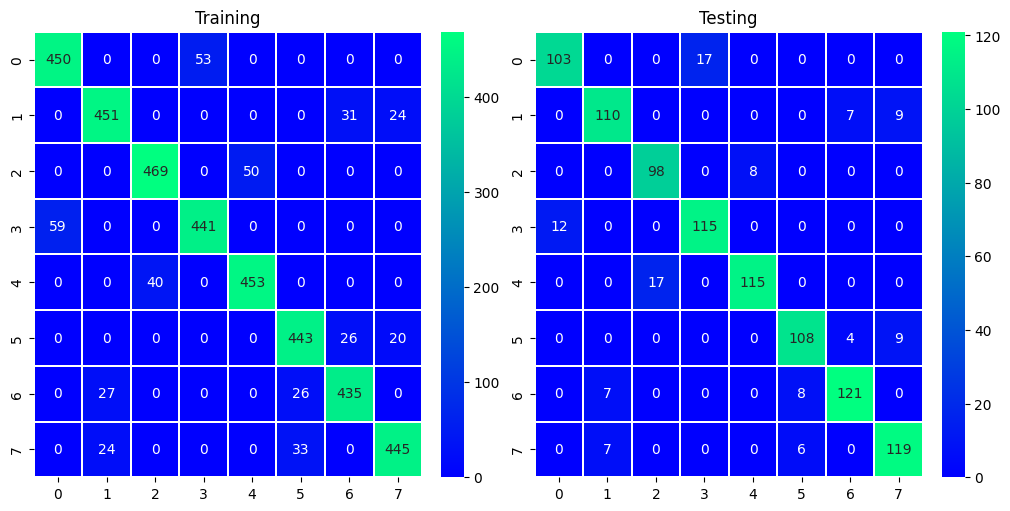

In [7]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [8]:
print(classification_report(y_test, y_pred))

                                                                       precision    recall  f1-score   support

                       Electronic Filing & Document Management System       0.90      0.86      0.88       120
    Electronic Filing Management With Simple Database Software & Apps       0.89      0.87      0.88       126
                Excel & Powerpoint For Powerful Business Applications       0.85      0.92      0.89       106
                           Interactive Dashboard with Microsoft Excel       0.87      0.91      0.89       127
                                  Managing General Affairs Excellence       0.93      0.87      0.90       132
                                Manajemen Filing & Tata Kelola Kantor       0.89      0.89      0.89       121
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel       0.92      0.89      0.90       136
                                        Secretary Development Program       0.87      0.90      0.88       132


In [9]:
a = model.predict_proba(X_test.iloc[:1, :])
b = ["Electronic Filing & Document Management System", "Electronic Filing Management With Simple Database Software & Apps", 
     "Excel & Powerpoint For Powerful Business Applications", "Interactive Dashboard with Microsoft Excel", "Managing General Affairs Excellence",
     "Manajemen Filing & Tata Kelola Kantor",
     "Powerful Database Analysis & Dashboard Reporting with Microsoft Excel", "Secretary Development Program",
     ]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Electronic Filing & Document Management System 19.62%
Electronic Filing Management With Simple Database Software & Apps 8.81%
Excel & Powerpoint For Powerful Business Applications 9.15%
Interactive Dashboard with Microsoft Excel 27.31%
Managing General Affairs Excellence 8.84%
Manajemen Filing & Tata Kelola Kantor 8.33%
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel 9.40%
Secretary Development Program 8.55%


In [10]:
model.predict(X_test.iloc[:1, :])

array(['Interactive Dashboard with Microsoft Excel'], dtype=object)

In [11]:
y_test.iloc[0]

'Interactive Dashboard with Microsoft Excel'

In [12]:
X_test.iloc[:1, :]

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,tren_mode_factor,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,upselling
1501,1501,P1502,UD Napitupulu (Persero) Tbk,Kadir Sitompul,"Gg. Otto Iskandardinata No. 14\nSalatiga, DKI ...",+62 (0993) 413-3583,purwantitugiman@example.org,Aktivitas Kesehatan Manusia Dan Aktivitas Sosial,2024-02-10,5,...,Ya,4,B1502,Ibun,17,7000000,33,Office & Administration Series,Powerful Database Analysis & Dashboard Reporti...,Electronic Filing & Document Management System
